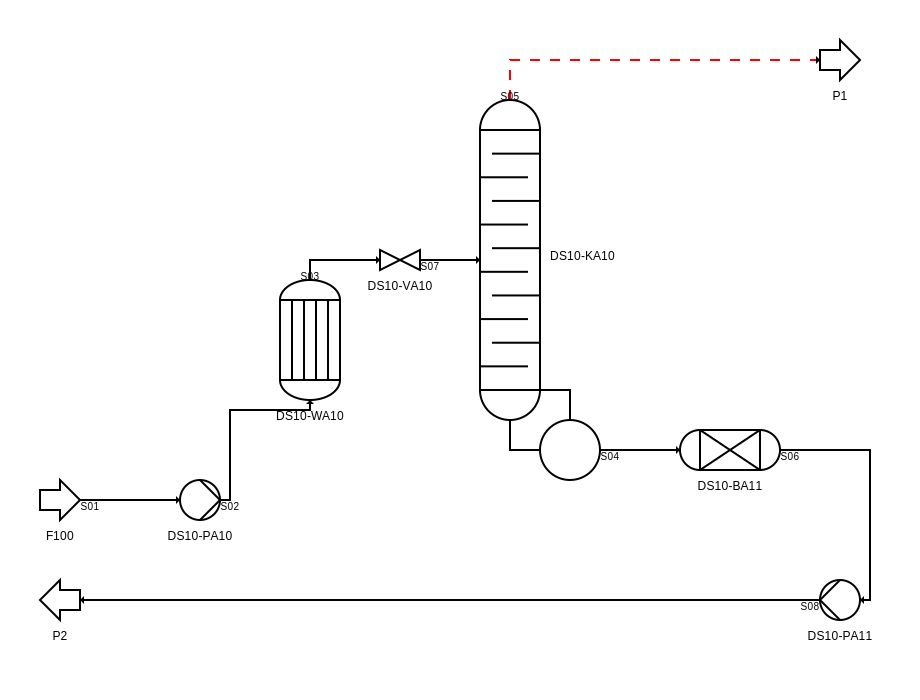

In [1]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, SvgContext
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment
from IPython.core.display import SVG, HTML

pfd= Flowsheet("V100-DS10","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(-80,480))
PA10=Pump("DS10-PA10","Vertical Vessel", position=(60,480))
BA10=Vessel("DS10-WA10","Vertical Vessel", position=(160,280), size=(60,120),capLength=20,internals="Tubes")
VA10=Valve("DS10-VA10","Control Valve", position=(260,250) )
KA10=Distillation("DS10-KA10","Distillation Tower", hasCondenser=False, hasReboiler=True,position=(360,100), size=(60,320), internals="trays")
BA11=Vessel("DS10-BA11","Horizontal Vessel", orientation="horizontal", position=(560,430), size=(100,40), capLength=20,internals="Bed" )
P1= StreamFlag("P1", "Product 1", position=(700,40))
P2= StreamFlag("P2", "Product 2", position=(-80,580))
PA11=Pump("DS10-PA11","Bottom Pump", position=(700,580))

pfd.addUnits( [Feed,PA10,BA10,VA10,KA10,BA11,P1,P2,PA11 ] )

pfd.connect("S01", Feed["Out"], PA10["In"] ) 
pfd.connect("S02", PA10["Out"], BA10["In"] ) 
pfd.connect("S03", BA10["Out"], VA10["In"] ) 
pfd.connect("S07", VA10["Out"], KA10["Feed"] ) 
pfd.connect("S04", KA10["Bottom"], BA11["In"] ) 
pfd.connect("S05", KA10["VOut"], P1["In"] ) 
pfd.connect("S06", BA11["Out"], PA11["In"] )
pfd.connect("S08", PA11["Out"], P2["In"] )
#Examples for Styling
pfd.streams["S05"].lineColor=(255,0,0,0,255)
pfd.streams["S05"].dashArray="10 10"

PA11.flip(axis="horizontal")
P2.flip(axis="horizontal")

KA10.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )
ctx= SvgContext("img/small_process.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))



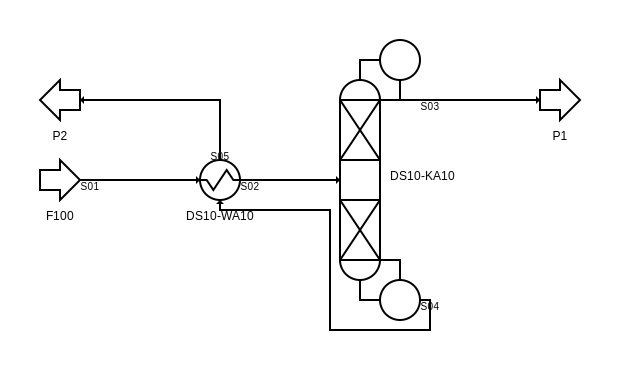

In [2]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, SvgContext
from IPython.core.display import SVG, HTML
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment


pfd2= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,200))
WA10=HeatExchanger("DS10-WA10","Pre-Heater", position=(160,200))
KA10=Distillation("DS10-KA10","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(300,120), size=(40,200), internals="packing")
P1= StreamFlag("P1", "Product 1", position=(500,120))
P2= StreamFlag("P2", "Product 2", position=(0,120))

pfd2.addUnits( [Feed,WA10,KA10,P1,P2] )

pfd2.connect("S01", Feed["Out"], WA10["TIn"] ) 
pfd2.connect("S02", WA10["TOut"], KA10["Feed"] ) 
pfd2.connect("S03", KA10["Top"], P1["In"] ) 
pfd2.connect("S04", KA10["Bottom"], WA10["SIn"] ) 
pfd2.connect("S05", WA10["SOut"], P2["In"] ) 
pfd2.showGrid=False
#P2.rotate(180)
P2.flip(axis="horizontal")
WA10.flip(axis="vertical")
KA10.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )

ctx2= SvgContext("img/simple_column.svg")
img2 = pfd2.draw(ctx2)
SVG(img2.render(scale=1))


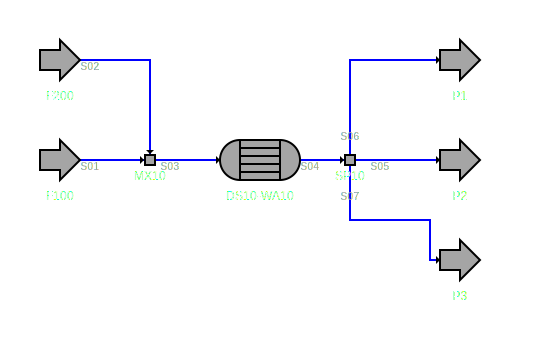

In [3]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, SvgContext, Mixer,Splitter
from IPython.core.display import SVG, HTML


pfd3= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,200))
Feed2= StreamFlag("F200", "Feed", position=(0,100))
MX10= Mixer("MX10", "Mixer", position=(100,210))
WA10=Vessel("DS10-WA10","Condenser", position=(180,200), orientation="horizontal", size=(80,40), internals="tubes")

SP10= Splitter("SP10", "Splitter", position=(300,210))

P2= StreamFlag("P1", "Product 1", position=(400,100))
P1= StreamFlag("P2", "Product 2", position=(400,200))
P3= StreamFlag("P3", "Product 2", position=(400,300))



pfd3.addUnits( [Feed,Feed2, MX10, WA10, SP10, P1,P2,P3] )

pfd3.connect("S01", Feed["Out"], MX10["In1"] ) 
pfd3.connect("S02", Feed2["Out"], MX10["In2"] ) 
pfd3.connect("S03", MX10["Out"], WA10["In"] ) 
pfd3.connect("S04", WA10["Out"], SP10["In"] ) 
pfd3.connect("S05", SP10["Out1"], P1["In"] ) 
pfd3.connect("S06", SP10["Out2"], P2["In"] ) 
pfd3.connect("S07", SP10["Out3"], P3["In"] ) 
pfd3.showGrid=False

for s in pfd3.streams.values():
    s.lineColor=(0,0,255,255)
    s.textColor=(165,165,165,255)

for u in pfd3.unitOperations.values():
    u.lineColor=(0,0,0,255)
    u.fillColor=(165,165,165,255)
    u.textColor=(255,255,255,255)

ctx3= SvgContext("img/styling_colouring.svg", (0,128,128) )
img3 = pfd3.draw(ctx3)
SVG(img3.render(scale=1))





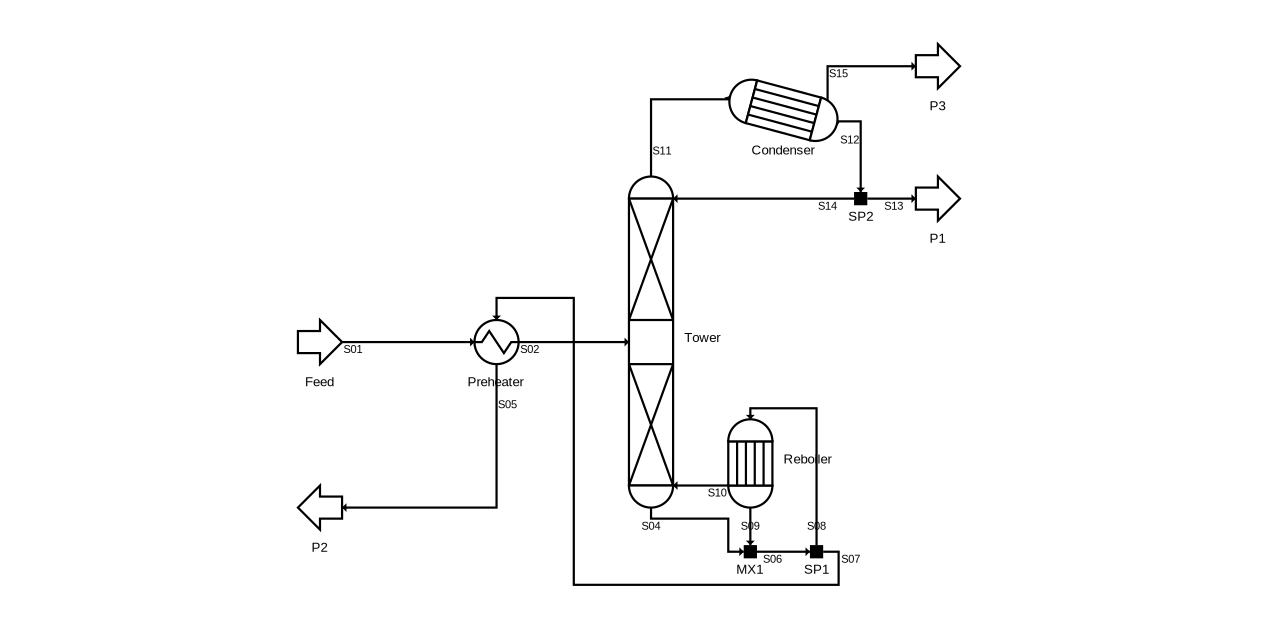

In [4]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, Mixer, Splitter, Port, SvgContext
from IPython.core.display import SVG, HTML
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment

pfd= Flowsheet("V100-DS10","Complex Distillation", "Demo Flowsheet for testing externalized columns peripherals and routing")

Feed= StreamFlag("Feed", "Feed", position=(0,250))
HX1=HeatExchanger("Preheater","Pre-Heater", position=(160,250))
TWR1=Distillation("Tower","Distillation Tower", hasCondenser=False, hasReboiler=False,position=(300,120), size=(40,300), internals="packing")
MX1= Mixer("MX1", "Mixer", position=(400,450))
SP1= Splitter("SP1", "Splitter", position=(460,450))
REB=Vessel("Reboiler","Falling Film Evaporator", position=(390,340), size=(40,80),capLength=20,internals="Tubes")
REB.ports["Out2"] = Port("Out2", REB, (0, .25), (-1, 0), intent="out")
COND=Vessel("Condenser","Condenser", position=(390,40), orientation="horizontal", size=(100,40), internals="tubes")
COND.ports["Out2"] = Port("Out2", COND, (0.85, 0), (0, -1), intent="out")
SP2= Splitter("SP2", "Reflux-Splitter", position=(500,130))
P1= StreamFlag("P1", "Product 1", position=(560,120))
P2= StreamFlag("P2", "Product 2", position=(0,400))
P3= StreamFlag("P3", "Product 3", position=(560,0))

#rotate units to resemble the actual plant layout
COND.rotate(15)
SP2.rotate(90)
P2.flip(axis="horizontal")
REB.flip(axis="vertical")

pfd.addUnits( [Feed,HX1,TWR1,MX1, SP1, REB,COND,SP2, P1,P2,P3] )

pfd.connect("S01", Feed["Out"], HX1["TIn"] ) 
pfd.connect("S02", HX1["TOut"], TWR1["Feed"] ) 
pfd.connect("S04", TWR1["LOut"], MX1["In1"] ) 
pfd.connect("S05", HX1["SOut"], P2["In"] ) 
pfd.connect("S06", MX1["Out"], SP1["In"] ) 
pfd.connect("S08", SP1["Out2"], REB["In"] ) 
pfd.connect("S09", REB["Out"], MX1["In2"] ) 
pfd.connect("S10", REB["Out2"], TWR1["VIn"] ) 
pfd.connect("S11", TWR1["VOut"], COND["In"] ) 
pfd.connect("S12", COND["Out"], SP2["In"] )
pfd.connect("S13", SP2["Out2"], P1["In"] ) 
pfd.connect("S14", SP2["Out3"], TWR1["RIn"] ) 
pfd.connect("S15", COND["Out2"], P3["In"] )
pfd.connect("S07", SP1["Out1"], HX1["SIn"] ) 

#If you do not like the automatic stream layout, you can manually define a sequence of relative steps (relative to last point). The first element is the difference in x direction, the second element is the difference in y. The route starts at the source connector.

pfd.streams["S07"].manualRouting=[(14,0),(0,30),(-240,0),(0,-260),(-70,0)] 
pfd.streams["S05"].labelOffset=(10,30)
pfd.streams["S07"].labelOffset=(25,10)
pfd.streams["S15"].labelOffset=(10,-10)
pfd.streams["S11"].labelOffset=(10,-10)

#Change the label positions to make them more readable
TWR1.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )
REB.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )

ctx= SvgContext("img/externalized_column_with_preheater.svg")
img = pfd.draw(ctx)
SVG(img.render(width=1280, height=640 ))

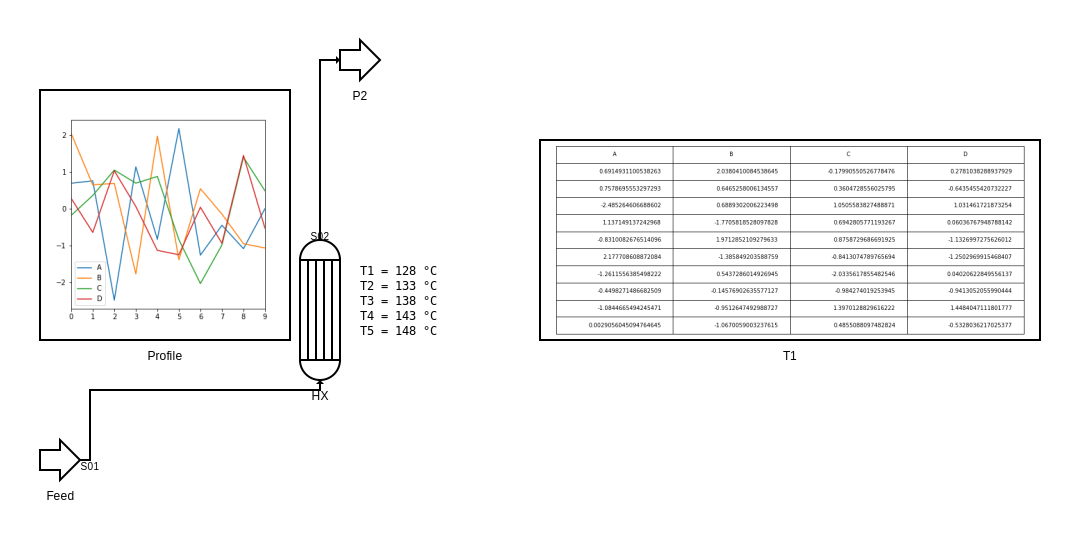

In [10]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, SvgContext,   TextElement
from pyflowsheet.annotations.table import Table
from pyflowsheet.annotations.figure import Figure

from IPython.core.display import SVG, HTML

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Turn the interactive plotting option off to prohibit the plot to be shown twice
plt.ioff()

#Create your dataframe
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

pfd= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("Feed", "Feed", position=(0,400))
HX=Vessel("HX","Condenser", position=(260,200), orientation="vertical", size=(40,140), internals="tubes")
P2= StreamFlag("P2", "Product 2", position=(300,000))

pfd.addUnits( [Feed,HX,P2] )
pfd.connect("S01", Feed["Out"], HX["In"] ) 
pfd.connect("S02", HX["Out"], P2["In"] ) 

#Create a new table object and pass the pandas table as the data argument. It will internally be rendered as a  matplotlib Table
T1 = Table("T1", "DemoTable", data=df, position=(500,100), size=(500,200),figsize=(12,5))

#Create your plot. Pass it to the Figure annotation. Pass the figure object as the fig parameter. It will internally be rendered into a base64 encoded string and embedded into the SVG drawing.
fig=df.plot(kind="line",figsize=(5,5))
F1 = Figure("Profile", "DemoFigure", fig=plt.gcf(), position=(00,50), size=(250,250))

#You can also create very simple tables on your own by creating callouts. In a real application the numbers would of course come from a real data source (simulation or plant data)
for i in range(1,6):
    pfd.callout(f"T{i} = {123+5*i} °C", (320,220+15*i) )

pfd.addAnnotations([F1,T1])

ctx= SvgContext("img/plots_and_tables.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))

  

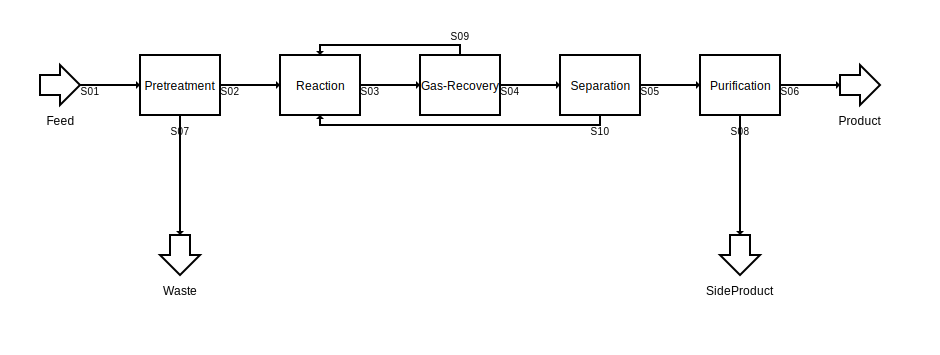

In [3]:
from pyflowsheet import Flowsheet, BlackBox, Stream, StreamFlag, Port, SvgContext,VerticalLabelAlignment, HorizontalLabelAlignment
from IPython.core.display import SVG, HTML

pfd= Flowsheet("V100","Block Flow Diagram", "Demo Flowsheet for showing block-flow diagram style")

SP1=BlackBox("Pretreatment","Removal of catalyst poisons", position=(100,180), size=(80,60))
SP2=BlackBox("Reaction","Catalytic reaction", position=(240,180), size=(80,60))
SP3=BlackBox("Gas-Recovery","Recycling of unconverted gaseous feedstock", position=(380,180), size=(80,60))
SP4=BlackBox("Separation","Recycling of solvent", position=(520,180), size=(80,60))
SP5=BlackBox("Purification","Removal of side product", position=(660,180), size=(80,60))

Feed= StreamFlag("Feed", "", position=(0,190))
Product= StreamFlag("Product", "", position=(800,190))
Waste= StreamFlag("Waste", "", position=(120,360))
SideProduct= StreamFlag("SideProduct", "", position=(680,360))

steps=[SP1,SP2,SP3,SP4,SP5]

for sp in steps:
    sp.setTextAnchor(HorizontalLabelAlignment.Center,VerticalLabelAlignment.Center,(0,5) )

Waste.rotate(90)
SideProduct.rotate(90)

#Add additional ports to the process steps for recycles and removal of unwanted components
SP1.ports["Out2"] = Port("Out2", SP1, (0.5, 1), (0, 1), intent="out")
SP5.ports["Out2"] = Port("Out2", SP5, (0.5, 1), (0, 1), intent="out")
SP3.ports["Out2"] = Port("Out2", SP3, (0.5, 0), (0, -1), intent="out")
SP4.ports["Out2"] = Port("Out2", SP4, (0.5, 1), (0, 1), intent="out")
SP2.ports["In2"] = Port("In2", SP2, (0.5, 0), (0, -1))
SP2.ports["In3"] = Port("In3", SP2, (0.5, 1), (0, 1))

#Add all units to the diagram
pfd.addUnits( [Feed,Product,Waste, SideProduct, SP1,SP2, SP3, SP4, SP5] )

#Create stream connectivity
pfd.connect("S01", Feed["Out"], SP1["In"] ) 
pfd.connect("S02", SP1["Out"], SP2["In"] ) 
pfd.connect("S03", SP2["Out"], SP3["In"] ) 
pfd.connect("S04", SP3["Out"], SP4["In"] ) 
pfd.connect("S05", SP4["Out"], SP5["In"] ) 
pfd.connect("S06", SP5["Out"], Product["In"] ) 
pfd.connect("S07", SP1["Out2"], Waste["In"] ) 
pfd.connect("S08", SP5["Out2"], SideProduct["In"] ) 
pfd.connect("S09", SP3["Out2"], SP2["In2"] ) 
pfd.connect("S10", SP4["Out2"], SP2["In3"] ) 

#Change the label offset for stream S09 to make it more readable
pfd.streams["S09"].labelOffset=(0,-5)

#Create a rendering context for the flowsheet and display it. pfd.draw(ctx) will also save the file to disc.
ctx= SvgContext("img/blockflowprocess.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))